In [1]:
import ario3.mriosystem as mrio_sys
import pathlib
import numpy as np
import pymrio as pym
import pandas as pd
import pickle

params = { "storage_dir": "BigScaleTest",
            "results_storage": "results",
            "bool_run_detailled": True,
            "register_stocks": True,
            "psi_param": 0.8,
            "model_time_step": 1,
            "timestep_dividing_factor": 100,
            "inventory_restoration_time": 30,
            "alpha_base": 1.0,
            "alpha_max": 1.25,
            "alpha_tau": 100,
            "rebuild_tau": 30,
            "n_timesteps": 365,
            "min_duration": (365 // 100) * 25,
            "impacted_region_base_production_toward_rebuilding": 0.005,
            "row_base_production_toward_rebuilding": 0.0,
            "mrio_params_file":"/home/sjuhel/Nextcloud/Thesis/Workbench/Code/ARIO3/BigScaleTest/mrio_params.json"
}


In [2]:
exio3 = pym.parse_exiobase3(path='./../../Data/IOT_2019_ixi.zip')
exio3.get_sectors()

Index(['Cultivation of paddy rice', 'Cultivation of wheat',
       'Cultivation of cereal grains nec',
       'Cultivation of vegetables, fruit, nuts', 'Cultivation of oil seeds',
       'Cultivation of sugar cane, sugar beet',
       'Cultivation of plant-based fibers', 'Cultivation of crops nec',
       'Cattle farming', 'Pigs farming',
       ...
       'Landfill of waste: Paper', 'Landfill of waste: Plastic',
       'Landfill of waste: Inert/metal/hazardous',
       'Landfill of waste: Textiles', 'Landfill of waste: Wood',
       'Activities of membership organisation n.e.c. (91)',
       'Recreational, cultural and sporting activities (92)',
       'Other service activities (93)',
       'Private households with employed persons (95)',
       'Extra-territorial organizations and bodies'],
      dtype='object', name='sector', length=163)

In [3]:
sec_agg_matrix = pd.read_excel("./../../Data/Données_SocioEco/Tableaux/aggreg EXIO.ods", sheet_name="input", engine="odf", header=None).to_numpy()
sec_agg_matrix.shape

(87, 163)

In [4]:
exio3.aggregate(sector_agg=sec_agg_matrix)
exio3.rename_sectors({"sec0": "Cultivation of paddy rice",
"sec1": "Cultivation of wheat",
"sec2": "Cultivation of cereal grains nec",
"sec3": "Cultivation of vegetables, fruit, nuts",
"sec4": "Cultivation nec",
"sec5": "Animal farming",
"sec6": "Milk, Animal products nec",
"sec7": "Wool, silk-worm cocoons",
"sec8": "Manure treatment, storage and land application",
"sec9": "Forestry, logging and related service activities (02)",
"sec10": "Fishing, operating of fish hatcheries and fish farms; service activities incidental to fishing (05)",
"sec11": "Mining of coal and lignite; extraction of peat (10)",
"sec12": "Extraction of crude petroleum and services related to crude oil extraction, excluding surveying",
"sec13": "Extraction of natural gas and services related to natural gas extraction, excluding surveying",
"sec14": "Extraction, liquefaction, and regasification of other petroleum and gaseous materials",
"sec15": "Mining of uranium and thorium ores (12)",
"sec16": "Mining of iron ores",
"sec17": "Mining of copper ores and concentrates",
"sec18": "Mining of nickel ores and concentrates",
"sec19": "Mining of aluminium ores and concentrates",
"sec20": "Mining of precious metal ores and concentrates",
"sec21": "Mining of lead, zinc and tin ores and concentrates",
"sec22": "Mining of other non-ferrous metal ores and concentrates",
"sec23": "Quarrying",
"sec24": "Processing of meat products",
"sec25": "Processing vegetable oils and fats",
"sec26": "Processing of dairy products",
"sec27": "Processed rice",
"sec28": "Sugar refining",
"sec29": "Processing of food products nec",
"sec30": "Manufacture of tobacco products (16)",
"sec31": "Manufacture of textiles (17)",
"sec32": "Manufacture of wearing apparel; dressing and dyeing of fur (18)",
"sec33": "Manufacture of wood and of products of wood and cork, except furniture; manufacture of articles of straw and plaiting materials (20)",
"sec34": "Paper",
"sec35": "Publishing, printing and reproduction of recorded media (22)",
"sec36": "Manufacture of coke oven products",
"sec37": "Petroleum Refinery",
"sec38": "Processing of nuclear fuel",
"sec39": "Plastics, basic",
"sec40": "Fertilisers",
"sec41": "Chemicals nec",
"sec42": "Manufacture of rubber and plastic products (25)",
"sec43": "Manufacture of glass and glass products",
"sec44": "Manufacture of ceramic goods",
"sec45": "Manufacture of construction products and cement",
"sec46": "Manufacture of other non-metallic mineral products n.e.c.",
"sec47": "Manufacture of basic iron and steel and of ferro-alloys and first products thereof",
"sec48": "Precious metals production",
"sec49": "Aluminium production",
"sec50": "Lead, zinc and tin production",
"sec51": "Copper production",
"sec52": "Other non-ferrous metal production",
"sec53": "Casting of metals",
"sec54": "Manufacture of fabricated metal products, except machinery and equipment (28)",
"sec55": "Manufacture of machinery and equipment n.e.c. (29)",
"sec56": "Manufacture of office machinery and computers (30)",
"sec57": "Manufacture of electrical machinery and apparatus n.e.c. (31)",
"sec58": "Manufacture of medical, precision and optical instruments, watches and clocks (33)",
"sec59": "Manufacture of transport equipment (34,35)",
"sec60": "Manufacture of furniture; manufacturing n.e.c. (36)",
"sec61": "Recycling of waste and scrap",
"sec62": "Production of electricity",
"sec63": "Transmission and distribution of electricity",
"sec64": "Manufacture of gas; distribution of gaseous fuels through mains",
"sec65": "Collection, purification and distribution of water (41)",
"sec66": "Construction (45)",
"sec67": "Sale, maintenance, repair of motor vehicles, motor vehicles parts, motorcycles, motor cycles parts and accessoiries",
"sec68": "Retail sale of automotive fuel",
"sec69": "Wholesale trade and commission trade, except of motor vehicles and motorcycles (51)",
"sec70": "Retail trade, except of motor vehicles and motorcycles; repair of personal and household goods (52)",
"sec71": "Hotels and restaurants (55)",
"sec72": "Transport via railways",
"sec73": "Other land transport",
"sec74": "Transport via pipelines",
"sec75": "Sea and coastal water transport",
"sec76": "Inland water transport",
"sec77": "Air transport (62)",
"sec78": "Supporting and auxiliary transport activities; activities of travel agencies (63)",
"sec79": "Post and telecommunications (64)",
"sec80": "Financial intermediation, insurance and pension funding (65)",
"sec81": "Renting of machinery and equipment without operator and of personal and household goods (71)",
"sec82": "Other business activities (74)",
"sec83": "Public administration and defence; compulsory social security (75)",
"sec84": "Education (80) and Health (85)",
"sec85": "Waste disposal",
"sec86": "Other (91,92,93,95)"})
exio3.calc_all()

In [5]:
import pickle as pkl
import datetime
with open("./../../Data/Données_SocioEco/Tableaux/exio_ixi_2019_"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+".pkl", 'wb') as f:
	pkl.dump(exio3, f)

In [44]:
exio3.get_sectors()

Index(['Cultivation of paddy rice', 'Cultivation of wheat',
       'Cultivation of cereal grains nec',
       'Cultivation of vegetables, fruit, nuts', 'Cultivation nec',
       'Animal farming', 'Milk, Animal products nec',
       'Wool, silk-worm cocoons',
       'Manure treatment, storage and land application',
       'Forestry, logging and related service activities (02)',
       'Fishing, operating of fish hatcheries and fish farms; service activities incidental to fishing (05)',
       'Mining of coal and lignite; extraction of peat (10)',
       'Extraction of crude petroleum and services related to crude oil extraction, excluding surveying',
       'Extraction of natural gas and services related to natural gas extraction, excluding surveying',
       'Extraction, liquefaction, and regasification of other petroleum and gaseous materials',
       'Mining of uranium and thorium ores (12)', 'Mining of iron ores',
       'Mining of copper ores and concentrates',
       'Mining of ni

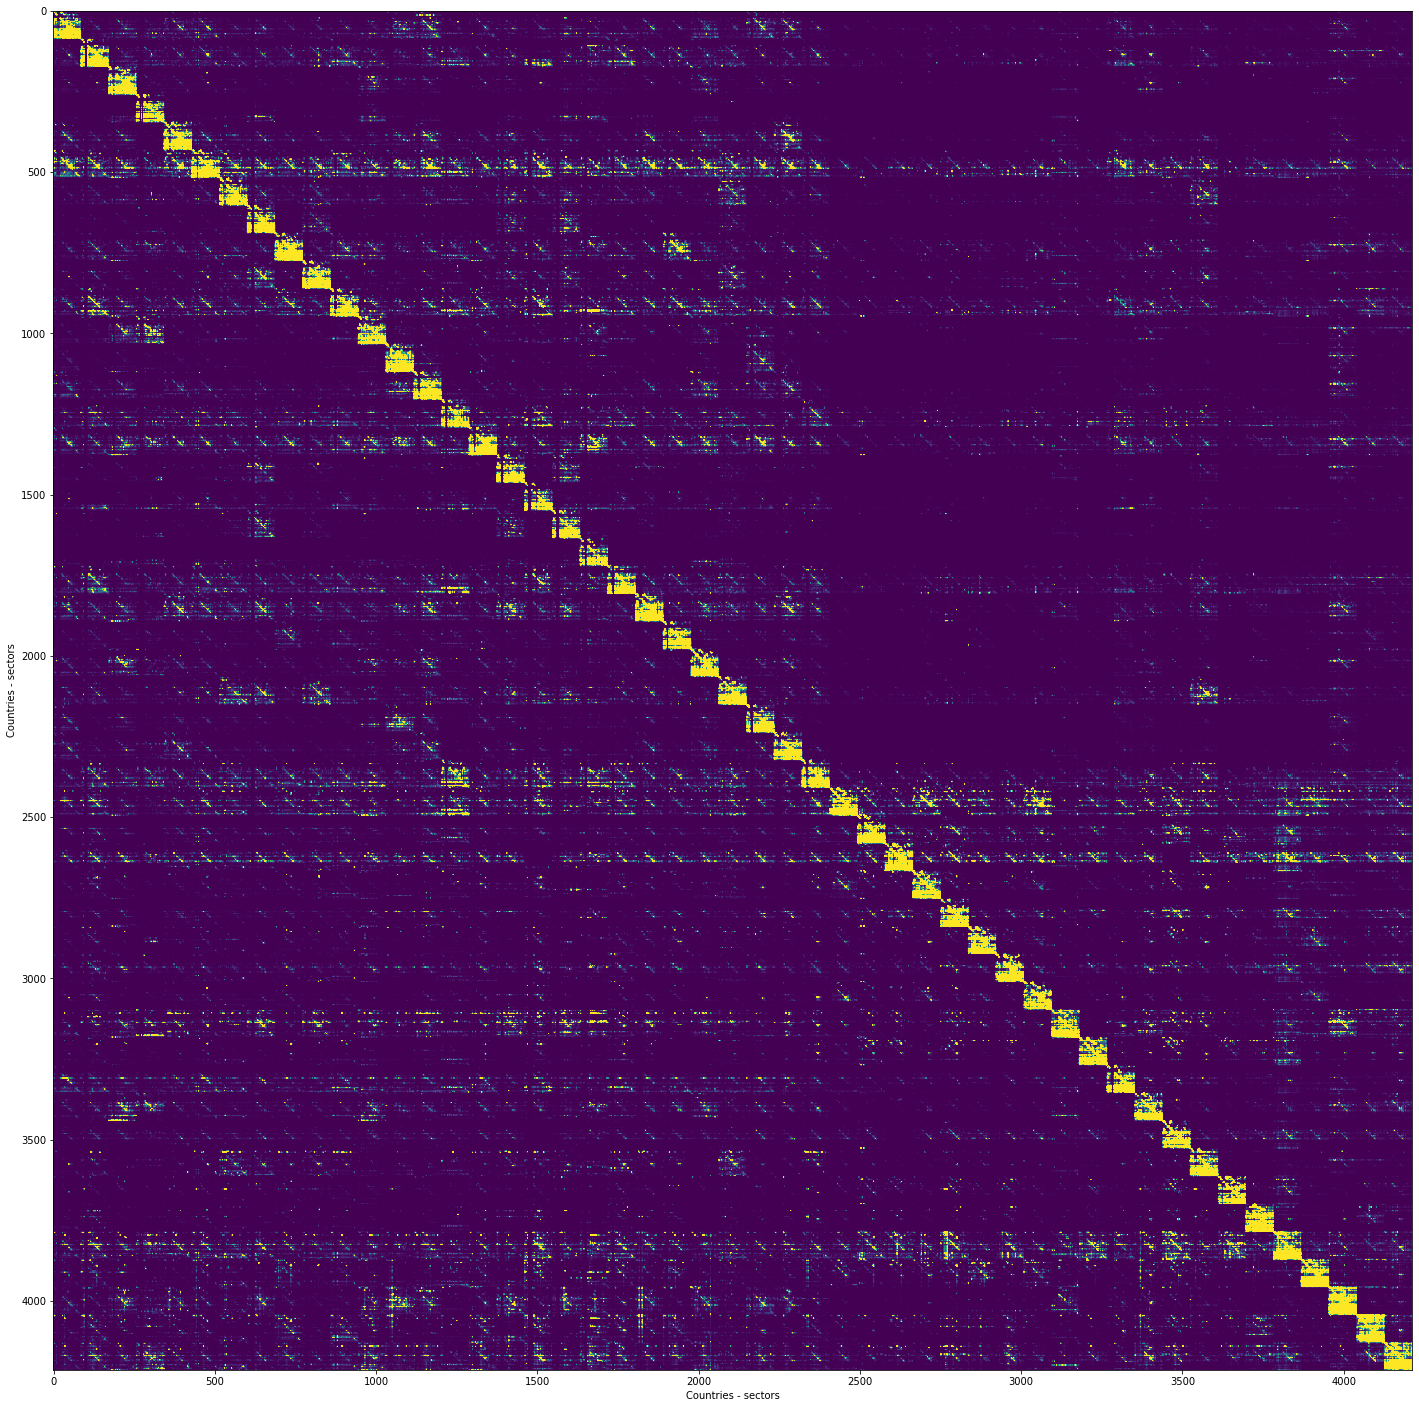

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25))
plt.imshow(exio3.A, vmax=1E-3)
plt.xlabel('Countries - sectors')
plt.ylabel('Countries - sectors')
plt.show()

In [21]:
display(exio3.unit)
display(exio3.x.query("""region == 'FR' & sector=='Cultivation of wheat' """)*1000000)

unit
region sector                                                   
AT     Cultivation of paddy rice                           M.EUR
       Cultivation of wheat                                M.EUR
       Cultivation of cereal grains nec                    M.EUR
       Cultivation of vegetables, fruit, nuts              M.EUR
       Cultivation of oil seeds                            M.EUR
...                                                          ...
WM     Activities of membership organisation n.e.c. (91)   M.EUR
       Recreational, cultural and sporting activities ...  M.EUR
       Other service activities (93)                       M.EUR
       Private households with employed persons (95)       M.EUR
       Extra-territorial organizations and bodies          M.EUR

[7987 rows x 1 columns]

,,indout
region,sector,
FR,Cultivation of wheat,9.215967e+09
